# CS246 - Colab 1
## Wordcount in Spark

### Setup

Let's setup Spark on your Colab environment.  Run the cell below!

In [1]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     |████████████████████████████████| 217.8MB 62kB/s 
     |████████████████████████████████| 204kB 53.8MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=f4fd7f4f872ddec4fd1f4228cbd356843d546fbe2e0c323d2a2dabb3beb68268
  Stored in directory: /root/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark
openjdk-8-jdk-headless is already the newest version (8u242-b08-0ubuntu3~18.04).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


Now we authenticate a Google Drive client to download the file we will be processing in our Spark job.

**Make sure to follow the interactive instructions.**

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
id='1SE6k_0YukzGd5wK-E4i6mG83nydlfvSa'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('pg100.txt')

If you executed the cells above, you should be able to see the file *pg100.txt* under the "Files" tab on the left panel.

### Your task

If you run successfully the setup stage, you are ready to work on the *pg100.txt* file which contains a copy of the complete works of Shakespeare.

Write a Spark application which outputs the number of words that start with each letter. This means that for every letter we want to count the total number of (non-unique) words that start with a specific letter. In your implementation **ignore the letter case**, i.e., consider all words as lower case. Also, you can ignore all the words **starting** with a non-alphabetic character.

In [0]:
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext
import pandas as pd

# create the Spark Session
spark = SparkSession.builder.getOrCreate()

# create the Spark Context
sc = spark.sparkContext

In [0]:
# read data
rdd = sc.textFile('pg100.txt')

In [11]:
rdd.take(3)

['The Project Gutenberg EBook of The Complete Works of William Shakespeare, by',
 'William Shakespeare',
 '']

In [26]:
wordRdd = rdd.flatMap(lambda s: s.split())
wordRdd.take(3)

['The', 'Project', 'Gutenberg']

In [0]:
diff = ord('a') - ord('A')

In [0]:
def startCount(char):  # char需要为小写
  words = wordRdd.filter(lambda word: word[0] in {char, chr(ord(char) - diff)} if word else False).cache()
  return words.count(), words.collect()

In [0]:
char = 'z'
count, words = startCount(char)

In [46]:
count

71

Once you obtained the desired results, **head over to Gradescope and submit your solution for this Colab**!

In [49]:
words[:10]

['zealous',
 'zealous',
 'zephyrs',
 'zone,',
 'Zounds,',
 'Zounds,',
 'zounds,',
 'Zounds,',
 'Zounds,',
 'Zounds,']

上面为探索阶段，下面正式计算所有字母开头的计数。

In [0]:
import pandas as pd

In [51]:
df = pd.DataFrame()
df['Char'] = [chr(i) for i in range(ord('a'), ord('z') + 1)]
df.head()

,Char
0,a
1,b
2,c
3,d
4,e


In [0]:
def getCount(char):  # char需要为小写
  words = wordRdd.filter(lambda word: word[0] in {char, chr(ord(char) - diff)} if word else False)
  return words.count()

In [0]:
df['Count'] = df['Char'].apply(getCount)

In [54]:
df

,Char,Count
0,a,84836
1,b,45455
2,c,34567
3,d,29713
4,e,18697
5,f,36814
6,g,20782
7,h,60563
8,i,62167
9,j,3339


In [56]:
df.Count.sum() / wordRdd.count()

0.9910747173033678

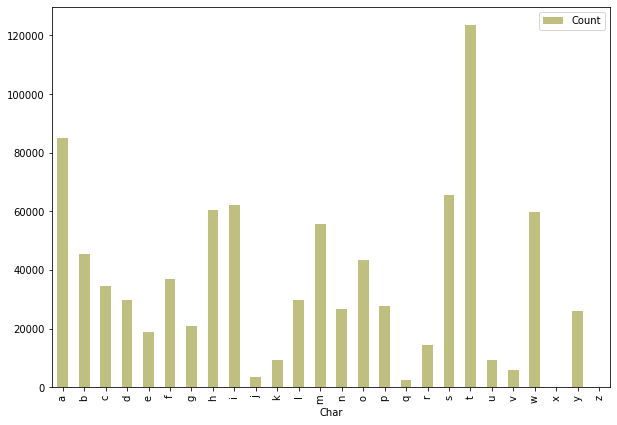

In [61]:
df.plot(kind='bar', x='Char', y='Count',
        figsize=(10, 7), alpha=0.5, color='olive')